# **Benchmarking Scratch Regression Model Against Scikit-Learn on Diabetes Dataset**

**Project Description**<br/>
This project implements linear regression from scratch using the diabetes dataset to predict disease progression. Core components such as the **cost function**, **gradient computation**, and **gradient descent** optimization are manually built using NumPy, without relying on machine learning libraries. The model is trained on 80% of the data, and evaluated on the test set using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
The model's performance is compared against standard implementations of **LinearRegression**, **Ridge**, and **Lasso** from scikit-learn. Results show that the custom model achieves competitive accuracy while providing deeper insights into the learning process via cost convergence plots.

## Importing libraries

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

## Loading Dataset and Splitting ( Training & Testing )

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

m = len(X_train) # training samples 

# Cost calculation 


In [3]:
def cost_function(x,y,w,b):
    m = x.shape[0]
    predictions = x @ w + b # Using vectorization method
    errors = predictions - y 
    cost = (1/(2*m)) * np.dot(errors, errors)

    return cost

# Gradient calculation 

In [4]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    predictions = x @ w + b 
    errors = predictions - y 
    dj_dw = (1 / m) * (x.T @ errors)
    dj_db = (1 / m) * np.sum(errors)

    return dj_dw, dj_db 

# Reducing cost by applying gradient descent

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_itr):
    w = w_in.copy()
    b = b_in
    cost_history = []
    for i in range(num_itr):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost every 100 iterations (or all, if you prefer)
        if i % 100 == 0 or i == num_itr - 1:
            cost = cost_function(x, y, w, b)
            cost_history.append(cost)
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, cost_history

# Initializing parameters for gradient descent

# Initialize parameters
w_init = np.zeros(X.shape[1])
b_init = 0.0
alpha = 0.09 # Learning rate
num_itr = 8000

# Run gradient descent
w_final, b_final, cost_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_itr)

# MSE and RMSE calculation

In [15]:
# Make predictions on test set
y_pred = X_test @ w_final + b_final
mse = np.mean((y_pred - y_test) ** 2)
# Calculate Root Mean Squared Error (RMSE)
rmse_scratch = np.sqrt(mse)
print(f"Mean Squared Error on test set: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Mean Squared Error on test set: 2865.2100
RMSE: 53.5277


# Gradient Descent Convergence visulization 

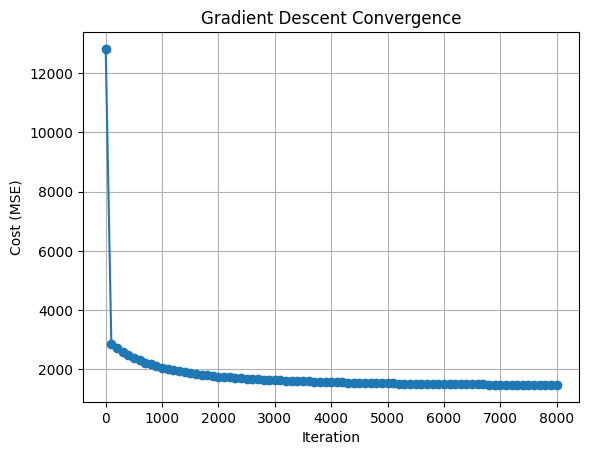

In [8]:
# Create corresponding iteration steps (every 100 steps + last)
iteration_steps = [i for i in range(0, num_itr, 100)]
if iteration_steps[-1] != num_itr - 1:
    iteration_steps.append(num_itr - 1)  # in case last step wasn't at 100 boundary

# Plot
plt.plot(iteration_steps, cost_history, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()

# Actual Vs. Predicted disease progression 

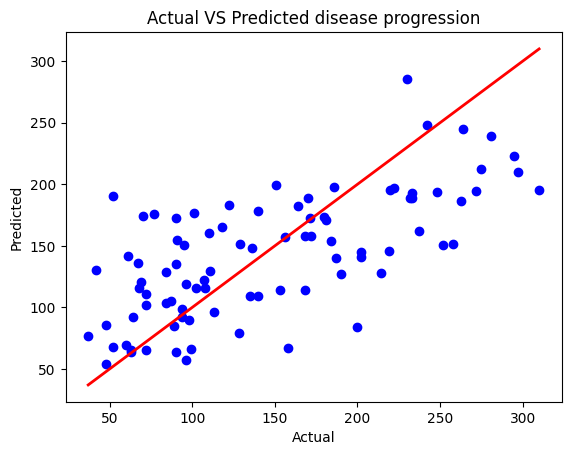

In [10]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted disease progression')
plt.show()

# sklearn regression models ( LinearRegression, Ridge, and Lasso )

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)
mse_sklearn = np.mean((y_pred_sklearn - y_test) ** 2)
rmse_sklearn = np.sqrt(mse_sklearn)
print(f"scikit-learn MSE: {rmse_sklearn:.4f}")

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = np.mean((y_pred_ridge - y_test) ** 2)
rmse_ridge = np.sqrt(mse_ridge)
print(f"Ridge MSE: {rmse_ridge:.4f}")

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = np.mean((y_pred_lasso - y_test) ** 2)
rmse_lasso = np.sqrt(mse_lasso)
print(f"Lasso MSE: {rmse_lasso:.4f}")

scikit-learn MSE: 53.8534
Ridge MSE: 55.4745
Lasso MSE: 52.8980


# Comparison between RMSE of scratch, sklearn Linear, Ridge and Lasso models 

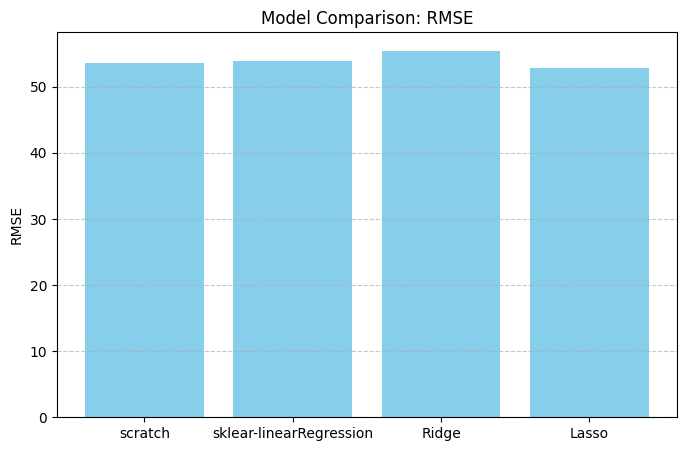

In [19]:
models = ['scratch', 'sklear-linearRegression', 'Ridge', 'Lasso']
rmse_values = [rmse_scratch, rmse_sklearn, rmse_ridge, rmse_lasso]

# plotting RMSE 
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color='skyblue')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)

 **Conclusion** <br/>
The custom polynomial regression model implemented from scratch achieved an RMSE of 53.53, closely matching scikit-learn’s LinearRegression (53.85) and outperforming Ridge (55.47). While Lasso regression achieved the lowest RMSE (52.90), the scratch model proved to be highly effective, validating the correctness of manual implementation and optimization via gradient descent.